# Imports


In [1]:
%pip install --upgrade torch torchvision --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [2]:
from tools.DataLoader import DataLoader
from tools.EDA import EDAEmbedding
from tools.TextPreprocessingPipeline import TextPreprocessingPipeline
from models.EmbeddingModel import EmbeddingModel
from models.MLModelTrainer import MLModelTrainer
from tools.ModelEvaluator import ModelEvaluator

[nltk_data] Downloading package stopwords to /home/nord/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)
print(torch.version.cuda)

print(torch.cuda.is_available())

2.4.1+cu118
0.19.1+cu118
11.8
False


# **Data Load**


In [4]:
loader = DataLoader()

In [5]:
data = loader.load_from_local(dataset_path="db/spam.csv", encoding="ISO-8859-1")
# loader.load_from_google_drive("db/spam.csv")

Данные успешно загружены из локального файла.


In [6]:
print(data.head())
print(type(data))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>


# **EDA**


In [7]:
eda = EDAEmbedding(data)

In [8]:
eda.drop_column("Unnamed: 3")
eda.drop_column("Unnamed: 2")
eda.drop_column("Unnamed: 4")

Column 'Unnamed: 3' has been removed.
Column 'Unnamed: 2' has been removed.
Column 'Unnamed: 4' has been removed.


In [9]:
eda.rename_column("v1", "y")
eda.rename_column("v2", "X")

Column 'v1' has been renamed to 'y'.
Column 'v2' has been renamed to 'X'.


In [10]:
eda.perform_full_eda()

Embedding Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       5572 non-null   object
 1   X       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


None


Embedding Dataset Shape:

(5572, 2)

Descriptive Statistics of Embeddings:



,count,unique,top,freq
y,5572,2,ham,4825
X,5572,5169,"Sorry, I'll call later",30


Found 403 duplicate rows.


,y,X
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


/home/nord/Documents/GitHub/goit-cv-hw10/src/tools/EDA.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


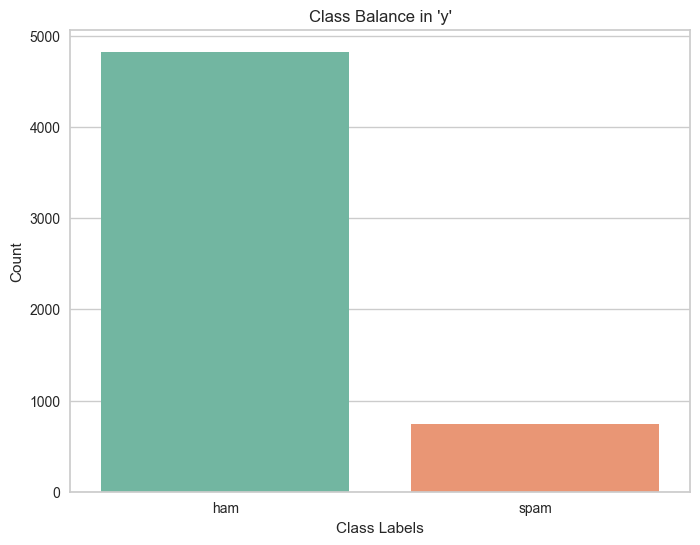

In [11]:
eda.plot_class_balance("y")

# Data Processing


In [12]:
X_train, X_test, y_train, y_test = loader.split_data(target_column="y")

Данные успешно разделены: 4457 тренировочных и 1115 тестовых образцов.


In [13]:
display(X_train.head())

,X
1978,No I'm in the same boat. Still here at my moms...
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,They r giving a second chance to rahul dengra.
4078,O i played smash bros &lt;#&gt; religiously.
4086,PRIVATE! Your 2003 Account Statement for 07973...


In [14]:
config = {
    "remove_html_tags": True,
    "remove_emails": True,
    "remove_urls": True,
    "lowercase": True,
    "expand_contractions": True,
    "remove_stopwords": True,
    "remove_punctuation": True,
    "lemmatize": True,
    "stem_words": False,  # Мы можем выбрать либо стемминг, либо лемматизацию
    "remove_digits": True,
    "remove_extra_spaces": True,
}

In [15]:
pipeline = TextPreprocessingPipeline(config)

In [16]:
X_train_processed = pipeline.preprocess_column(X_train, "X")

100%|██████████| 4457/4457 [00:15<00:00, 288.44it/s]


In [17]:
X_test_processed = pipeline.preprocess_column(X_test, "X")

100%|██████████| 1115/1115 [00:03<00:00, 325.09it/s]


In [18]:
display(X_train_processed[["X", "X_processed"]])

,X,X_processed
1978,No I'm in the same boat. Still here at my moms...,boat still mom check yo half naked
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,bank granite issue strong buy explosive pick m...
3935,They r giving a second chance to rahul dengra.,give second chance rahul dengra
4078,O i played smash bros &lt;#&gt; religiously.,play smash bros lt gt religiously
4086,PRIVATE! Your 2003 Account Statement for 07973...,private account statement show un redeem point...
...,...,...
3772,I came hostel. I m going to sleep. Plz call me...,come hostel go sleep plz call class hrishi
5191,"Sorry, I'll call later",sorry call later
5226,Prabha..i'm soryda..realy..frm heart i'm sory,prabha soryda realy frm heart sory
5390,Nt joking seriously i told,not joke seriously tell


In [19]:
display(X_train_processed.head())

,X,X_processed
1978,No I'm in the same boat. Still here at my moms...,boat still mom check yo half naked
3989,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,bank granite issue strong buy explosive pick m...
3935,They r giving a second chance to rahul dengra.,give second chance rahul dengra
4078,O i played smash bros &lt;#&gt; religiously.,play smash bros lt gt religiously
4086,PRIVATE! Your 2003 Account Statement for 07973...,private account statement show un redeem point...


# Model Training


In [20]:
embedding_model = EmbeddingModel("word2vec-google-news-300")

Загрузка предобученной модели эмбеддингов 'word2vec-google-news-300'...
Модель 'word2vec-google-news-300' загружена успешно!


In [21]:
X_train_embeddings = embedding_model.apply_embeddings(X_train_processed, "X")
X_test_embeddings = embedding_model.apply_embeddings(X_test_processed, "X")

100%|██████████| 1115/1115 [00:00<00:00, 27199.78it/s]


In [22]:
X_train_processed_text = X_train_processed["X"]
X_test_processed_text = X_test_processed["X"]

In [23]:
model_trainer = MLModelTrainer(model_type="LogisticRegression")

In [24]:
print("\nTraining with BoW:")
bow_model, bow_vectorizer = model_trainer.train_with_bow(
    X_train_processed_text, y_train
)


Training with BoW:


In [25]:
print("\nTraining with TF-IDF:")
tfidf_model, tfidf_vectorizer = model_trainer.train_with_tfidf(
    X_train_processed_text, y_train
)


Training with TF-IDF:


In [26]:
embeddings_model = model_trainer.train_with_embeddings(X_train_embeddings, y_train)

# Model Evaluation


In [27]:
evaluator = ModelEvaluator()

,Metric,Value
0,Accuracy,0.963229
1,Balanced Accuracy,0.888670
2,Precision,0.962435
3,Recall,0.963229
4,F1 Score,0.961919
5,ROC-AUC,0.971682


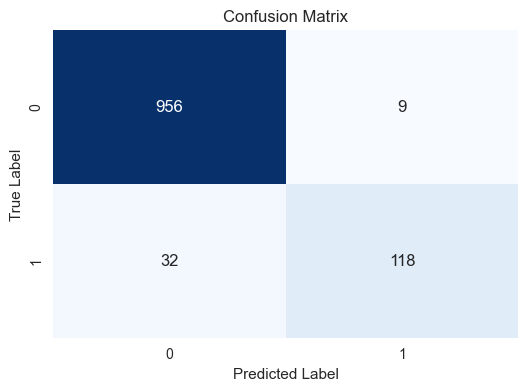

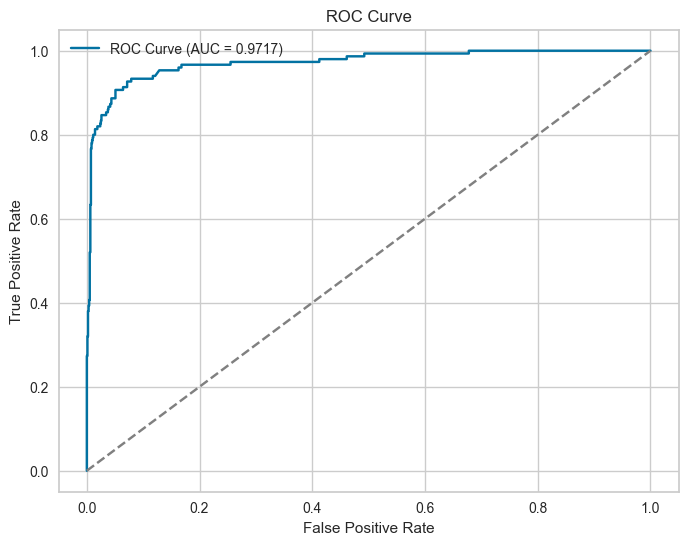


        Описание метрик:

        1. **Accuracy** — точность. Соотношение правильно предсказанных наблюдений к общему числу наблюдений. 
           Пример: 80% — это значит, что 80% наблюдений были предсказаны правильно.

        2. **Balanced Accuracy** — сбалансированная точность. Среднее значение между точностью по каждому классу, особенно полезна при несбалансированных классах.

        3. **Precision** — точность. Соотношение правильно предсказанных положительных наблюдений ко всем предсказанным положительным наблюдениям. 
           Пример: Если модель предсказала 100 положительных случаев, но только 80 из них были правильными, точность составит 80%.

        4. **Recall** — полнота. Соотношение правильно предсказанных положительных наблюдений ко всем реальным положительным наблюдениям. 
           Пример: Если есть 100 положительных случаев и модель нашла 80 из них, то полнота будет 80%.

        5. **F1 Score** — гармоническое среднее между точностью и полнотой. Это мера, кото

,Metric,Value
0,Accuracy,0.963229
1,Balanced Accuracy,0.888670
2,Precision,0.962435
3,Recall,0.963229
4,F1 Score,0.961919
5,ROC-AUC,0.971682


In [28]:
evaluator.display_results(embeddings_model, X_test_embeddings, y_test, show_help=True)

In [29]:
# 2. Сравнение моделей
models = {
    "BoW": bow_model,
    "TF-IDF": tfidf_model,
    "Embeddings": embeddings_model,
}

vectorizers = {
    "BoW": bow_vectorizer,
    "TF-IDF": tfidf_vectorizer,
    # Для Embeddings не нужен vectorizer
}

test_data = {
    "BoW": X_test_processed_text,
    "TF-IDF": X_test_processed_text,
    "Embeddings": X_test_embeddings,
}

In [30]:
evaluator.compare_models(
    models, test_data, y_test, vectorizers=vectorizers, show_help=True
)


Processing model: BoW
Shape of input data for model 'BoW': (1115,)
Shape of vectorized data for model 'BoW': (1115, 7735)


ValueError: X has 7735 features, but LogisticRegression is expecting 300 features as input.